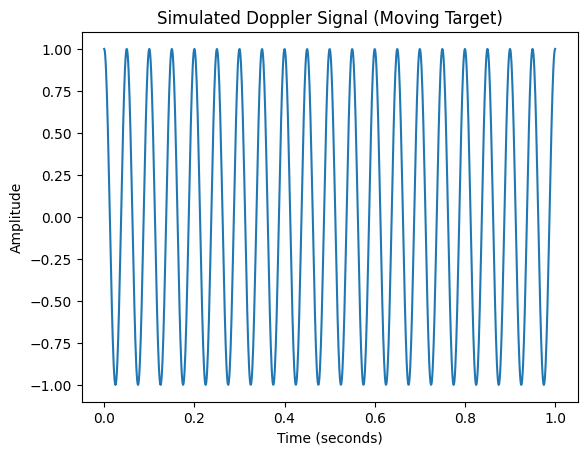

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(0, 1, 1000)

# Simulated Doppler frequency (Hz)
fd = 20  

# Radar return signal
signal = np.cos(2 * np.pi * fd * t)

# Plot
plt.figure()
plt.plot(t, signal)
plt.title("Simulated Doppler Signal (Moving Target)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


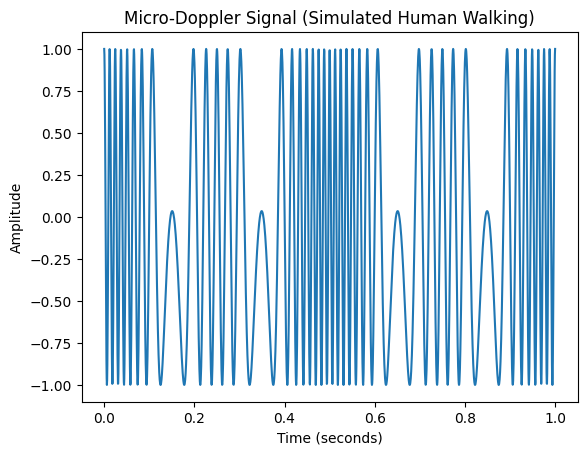

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 2000)

# Main Doppler frequency (body motion)
fd_body = 20  

# Micro-Doppler frequency (limb motion)
fd_micro = 2  

# Micro motion strength
micro_amplitude = 5  

# Micro-Doppler modulated signal
signal_micro = np.cos(
    2 * np.pi * (
        fd_body * t + 
        micro_amplitude * np.sin(2 * np.pi * fd_micro * t)
    )
)

plt.figure()
plt.plot(t, signal_micro)
plt.title("Micro-Doppler Signal (Simulated Human Walking)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()
